In [1]:
from libero.libero.envs import OffScreenRenderEnv
env_args = {
    "bddl_file_name": "/home/yygx/UNC_Research/pkgs_simu/LIBERO/libero/libero/bddl_files/modified_libero/KITCHEN_SCENE2_stack_the_black_bowl_at_the_front_on_the_black_bowl_in_the_middle_with_popcorn_in_the_bowl.bddl",
    "camera_heights": 128,
    "camera_widths": 128,
}

env = OffScreenRenderEnv(**env_args)

[robosuite WARNING] No private macro file found! (macros.py:53)
[robosuite WARNING] It is recommended to use a private macro file (macros.py:54)
[robosuite WARNING] To setup, run: python /home/yygx/anaconda3/envs/libero/lib/python3.8/site-packages/robosuite/scripts/setup_macros.py (macros.py:55)


In [3]:
sim = env.get_sim_state()
env.set_init_state(sim)

OrderedDict([('robot0_joint_pos',
              array([ 0.        , -0.16103739,  0.        , -2.44459747,  0.        ,
                      2.2267522 ,  0.78539816])),
             ('robot0_joint_pos_cos',
              array([ 1.        ,  0.98706148,  1.        , -0.76677449,  1.        ,
                     -0.60991702,  0.70710678])),
             ('robot0_joint_pos_sin',
              array([ 0.        , -0.16034226,  0.        , -0.64191657,  0.        ,
                      0.79246529,  0.70710678])),
             ('robot0_joint_vel', array([0., 0., 0., 0., 0., 0., 0.])),
             ('robot0_eef_pos',
              array([-0.20846466,  0.        ,  1.17327948])),
             ('robot0_eef_quat',
              array([ 9.99596605e-01,  2.46212832e-04, -2.84001205e-02, -6.99529596e-06])),
             ('robot0_gripper_qpos', array([ 0.020833, -0.020833])),
             ('robot0_gripper_qvel', array([0., 0.])),
             ('agentview_image',
              array([[[200, 182, 

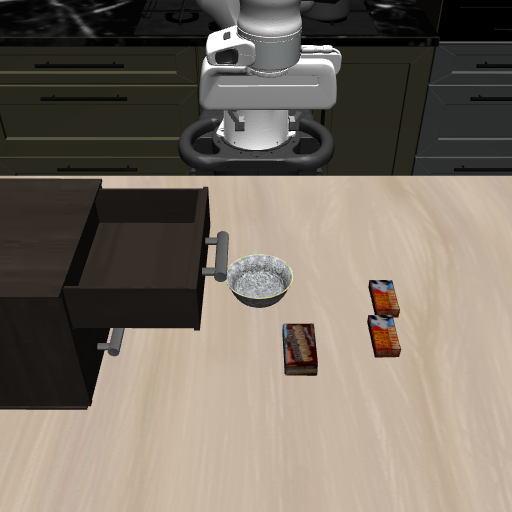

In [11]:
import numpy as np
from libero.libero.envs import OffScreenRenderEnv
from PIL import Image
env_args = {
    "bddl_file_name": "/home/yygx/UNC_Research/pkgs_simu/LIBERO/libero/libero/bddl_files/modified_libero/KITCHEN_SCENE10_put_the_black_bowl_in_the_top_drawer_of_the_cabinet_with_bottom_drawer_open.bddl",
    "camera_heights": 512,
    "camera_widths": 512,
}

env = OffScreenRenderEnv(**env_args)
env.reset()
obs = env.set_init_state(np.load("init_state.npy"))
display(Image.fromarray(obs["agentview_image"][::-1]))

In [12]:
import os

from libero.libero.envs import OffScreenRenderEnv
import h5py
import numpy as np
from PIL import Image
from pathlib import Path

def hdf5_to_dict(group):
    result = {}
    for key, item in group.items():
        if isinstance(item, h5py.Group):  # If the item is a group, recursively convert it
            result[key] = hdf5_to_dict(item)
        elif isinstance(item, h5py.Dataset):  # If the item is a dataset, convert it to a numpy array
            result[key] = item[()]
        else:
            raise TypeError(f"Unsupported HDF5 item type: {type(item)}")
    return result

def load_hdf5_file_to_dict(file_path):
    with h5py.File(file_path, 'r') as f:
        return hdf5_to_dict(f)
    
demos_path = "/home/yygx/UNC_Research/pkgs_simu/LIBERO/libero/datasets/libero_90/KITCHEN_SCENE10_put_the_black_bowl_in_the_top_drawer_of_the_cabinet_demo.hdf5"
demo_pth = demos_path
data_dict = load_hdf5_file_to_dict(demo_pth)['data']
for demo_idx in list(data_dict.keys()):
    print(f">> demo_idx: {demo_idx}")
    demo = data_dict[demo_idx]
    # np.save("init_state.npy", demo['states'][0])
    break
    


>> demo_idx: demo_0


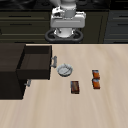

In [20]:
display(Image.fromarray(demo['obs']['agentview_rgb'][0][::-1]))

In [26]:
import numpy as np
from libero.libero.envs import OffScreenRenderEnv
from PIL import Image
import matplotlib.pyplot as plt

# Set up environment
env_args = {
    "bddl_file_name": "/home/yygx/UNC_Research/pkgs_simu/LIBERO/libero/libero/bddl_files/modified_libero/KITCHEN_SCENE10_put_the_black_bowl_in_the_top_drawer_of_the_cabinet_with_bottom_drawer_open.bddl",
    "camera_heights": 512,
    "camera_widths": 512,
}

env = OffScreenRenderEnv(**env_args)
env.reset()

# Load initial state
state_array = np.load("init_state.npy")
obs = env.set_init_state(state_array)


(56,)

In [27]:
obs['object-state']

array([-1.08711360e-01,  5.30645070e-03,  8.98158515e-01, -1.07245372e-05,
       -1.43106170e-06,  7.07106785e-01,  7.07106778e-01,  1.03880340e-01,
        1.10992733e-02,  2.72762705e-01,  7.19576657e-01, -6.94021404e-01,
       -2.04090215e-02,  1.12826750e-02, -1.31121715e-02,  1.99203855e-01,
        9.08654876e-01, -8.19692781e-07, -4.73953423e-06,  1.00000000e+00,
       -4.08888369e-10,  2.05796994e-01, -1.79047096e-01,  2.55357850e-01,
        1.80700477e-02, -9.99564648e-01, -6.46475004e-03,  2.24018395e-02,
       -9.83001904e-02,  2.13177674e-01,  9.08654876e-01, -8.19692781e-07,
       -4.73953423e-06,  1.00000000e+00, -4.08888369e-10,  1.21250858e-01,
       -1.96112671e-01,  2.58961106e-01,  1.80700477e-02, -9.99564648e-01,
       -6.46475004e-03,  2.24018395e-02,  1.93703923e-02,  6.58740320e-02,
        9.12923258e-01, -4.33232187e-07,  2.14144774e-06,  1.00000000e+00,
        9.57021026e-09,  2.33255706e-01, -4.45810018e-02,  2.51476838e-01,
        1.80702060e-02, -

In [35]:
state_array[38:]

array([-1.58388178e-01,  0.00000000e+00,  0.00000000e+00,  3.35706502e-02,
        2.46775220e-01,  1.18711508e-01,  2.31501963e-01, -1.51562995e-01,
       -3.31208942e-02,  2.43226433e-01,  5.72478923e-02, -5.77735535e-02,
        1.41469649e-07, -3.49066437e-08,  6.56114119e-03, -7.86050532e-05,
        2.07750697e-05, -1.28762607e-09, -5.72845837e-09, -4.14254996e-08,
        6.97108428e-04, -5.21494746e-06,  6.75776381e-07,  3.81550373e-10,
       -5.72845837e-09, -4.14254996e-08,  6.97108428e-04, -5.21494746e-06,
        6.75776381e-07,  3.81550373e-10, -1.79115200e-07,  9.46356351e-08,
        3.41871615e-03,  7.38368198e-06,  1.39202384e-05,  3.55695742e-10,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

State Array Shape: (77,)
State Array Contents: [ 2.50000000e-01  1.91761979e-03 -1.46218301e-01  3.69643941e-02
 -2.42543426e+00 -8.40360914e-03  2.23423706e+00  7.93429770e-01
  3.40967006e-02 -3.40041852e-02 -1.08711360e-01  5.30645070e-03
  8.98158515e-01  7.07106778e-01 -1.07245372e-05 -1.43106170e-06
  7.07106785e-01 -1.31121715e-02  1.99203855e-01  9.08654876e-01
 -4.08888369e-10 -8.19692781e-07 -4.73953423e-06  1.00000000e+00
 -9.83001904e-02  2.13177674e-01  9.08654876e-01 -4.08888369e-10
 -8.19692781e-07 -4.73953423e-06  1.00000000e+00  1.93703923e-02
  6.58740320e-02  9.12923258e-01  9.57021026e-09 -4.33232187e-07
  2.14144774e-06  1.00000000e+00 -1.58388178e-01  0.00000000e+00
  0.00000000e+00  3.35706502e-02  2.46775220e-01  1.18711508e-01
  2.31501963e-01 -1.51562995e-01 -3.31208942e-02  2.43226433e-01
  5.72478923e-02 -5.77735535e-02  1.41469649e-07 -3.49066437e-08
  6.56114119e-03 -7.86050532e-05  2.07750697e-05 -1.28762607e-09
 -5.72845837e-09 -4.14254996e-08  6.9710842

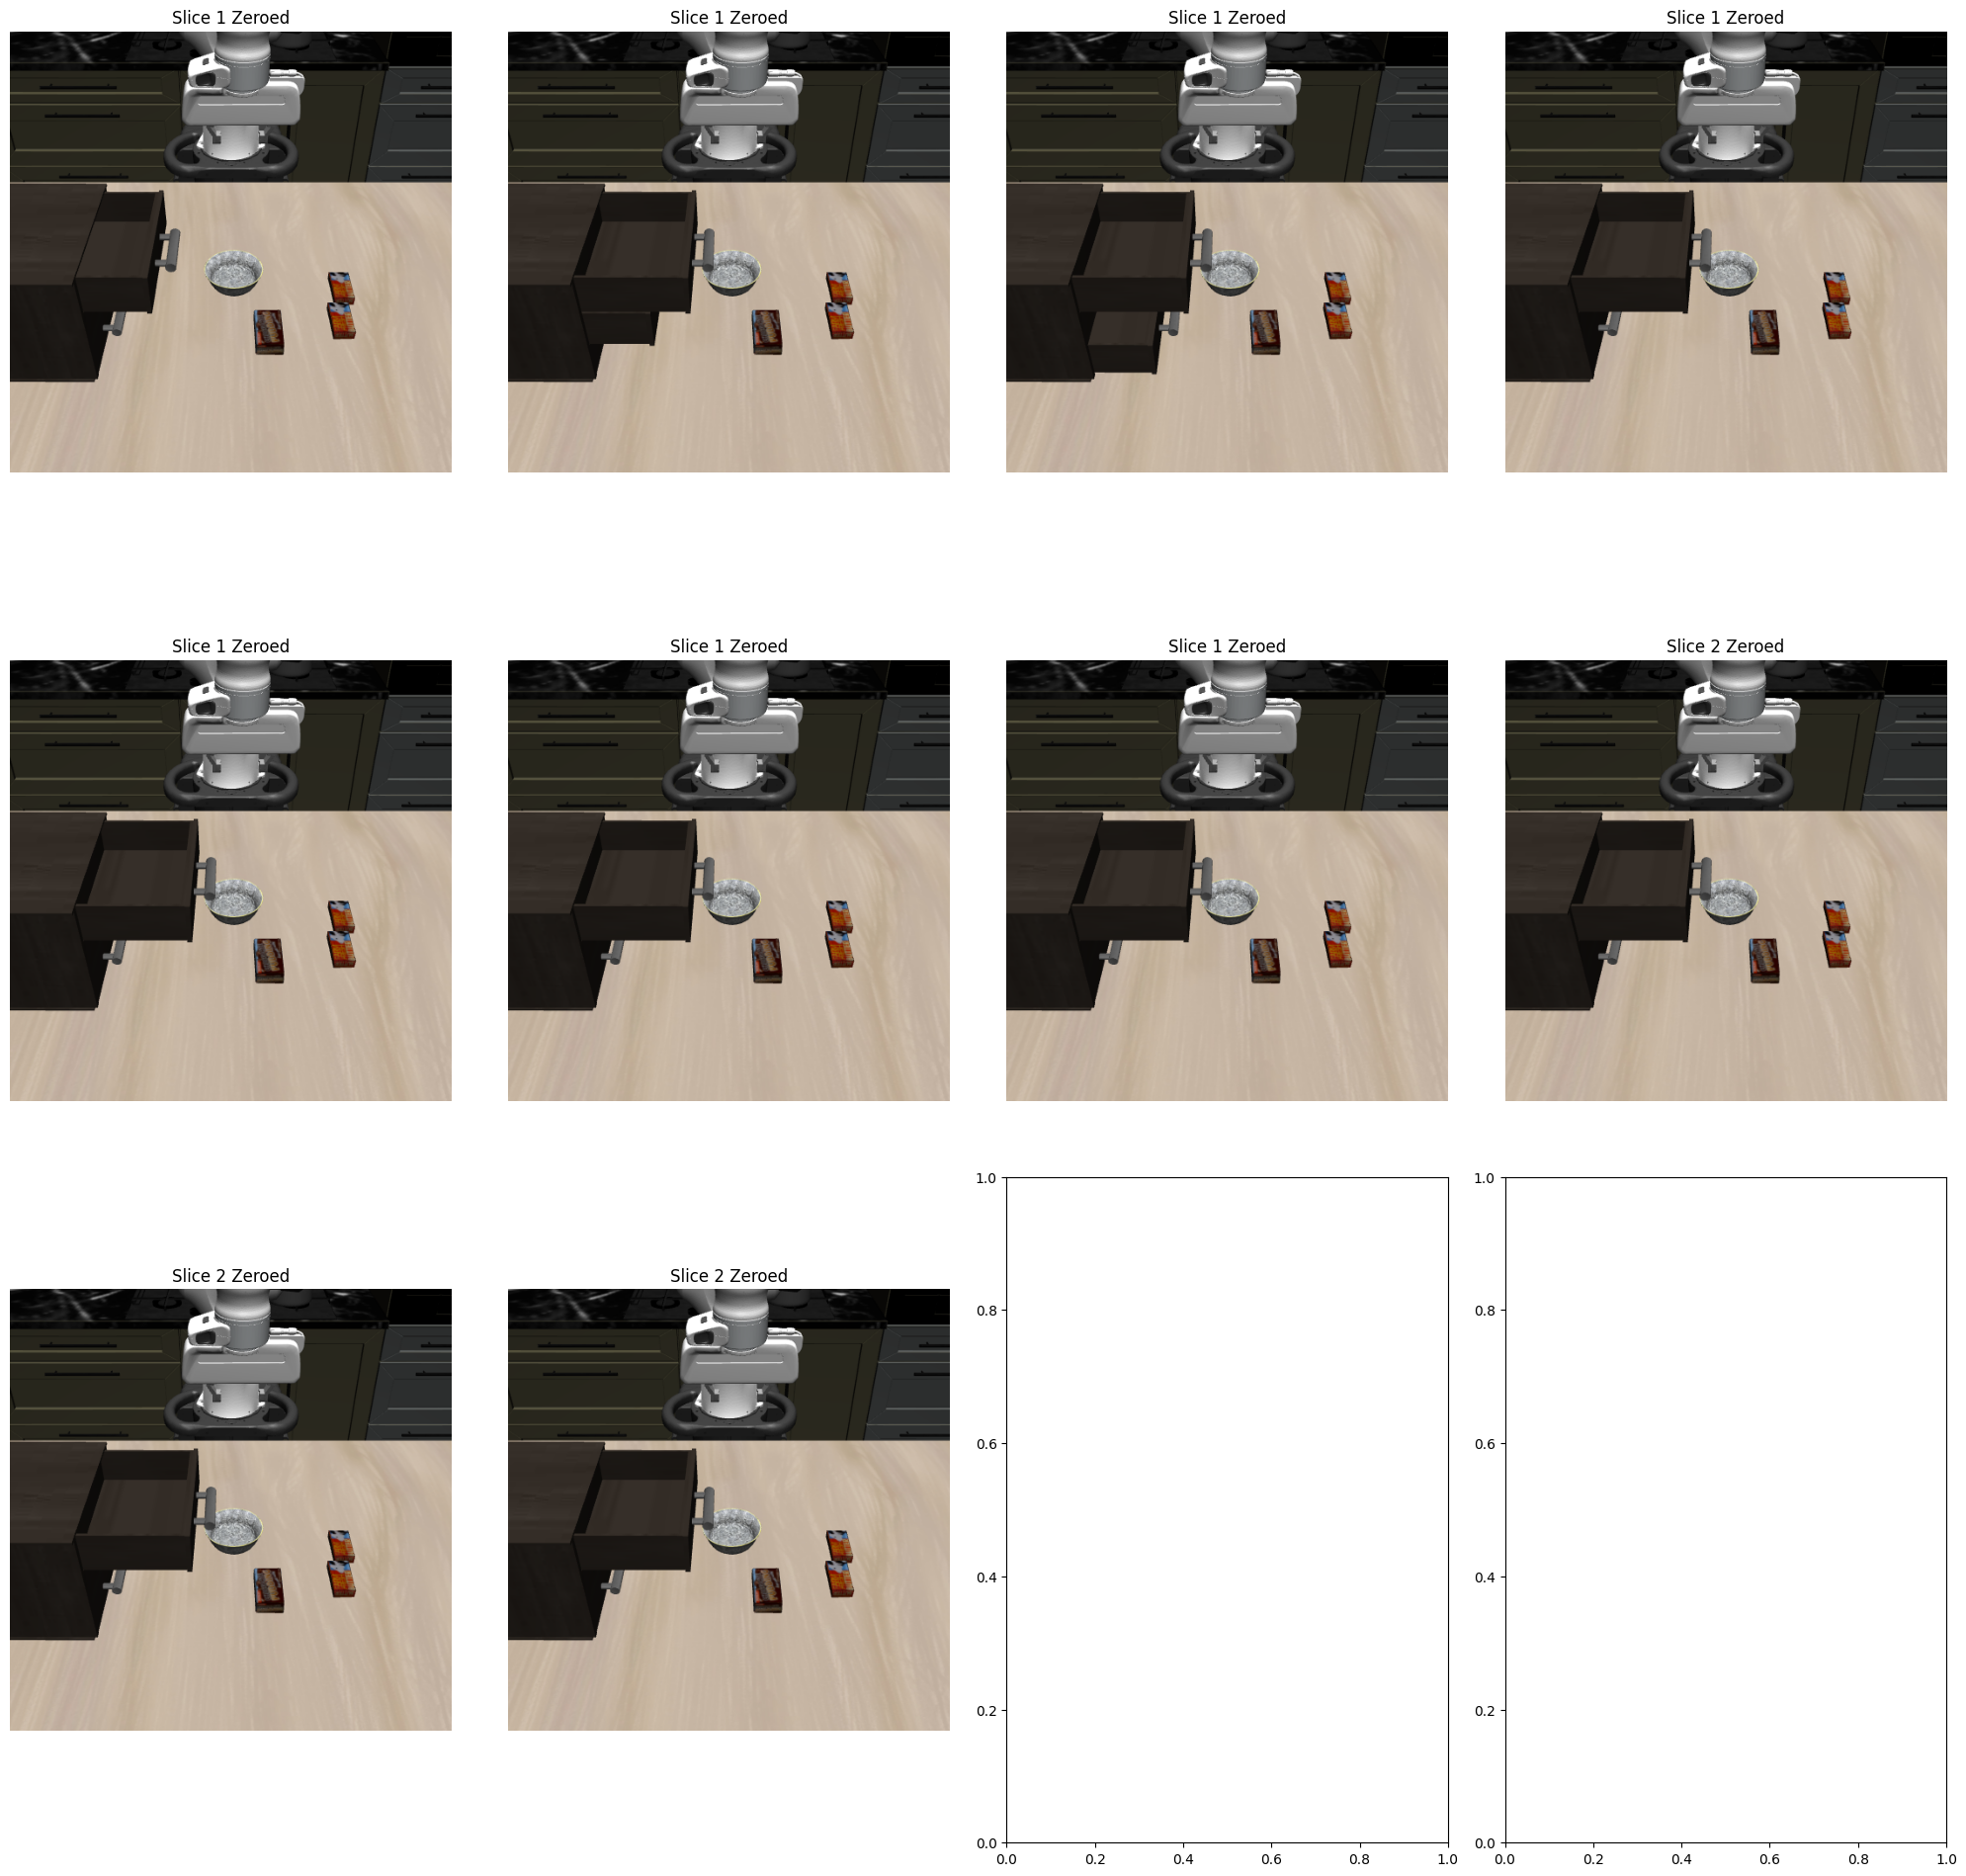

In [44]:
import numpy as np
from libero.libero.envs import OffScreenRenderEnv
from PIL import Image
import matplotlib.pyplot as plt

# Set up environment
env_args = {
    "bddl_file_name": "/home/yygx/UNC_Research/pkgs_simu/LIBERO/libero/libero/bddl_files/modified_libero/KITCHEN_SCENE10_put_the_black_bowl_in_the_top_drawer_of_the_cabinet_with_bottom_drawer_open.bddl",
    "camera_heights": 512,
    "camera_widths": 512,
}

env = OffScreenRenderEnv(**env_args)
env.reset()

# Load initial state
state_array = np.load("init_state.npy")
obs = env.set_init_state(state_array)

# Print the shape and contents to understand the dimensions
print("State Array Shape:", state_array.shape)
print("State Array Contents:", state_array)

# Prepare to plot the modified images
fig, axes = plt.subplots(3, 4, figsize=(20, 20))  # Create a 3x4 grid for 12 images
axes = axes.flatten()

# Loop through the state_array in steps of 7
for i in range(10):
    modified_state = state_array.copy()  # Make a copy of the original state
    # modified_state[i:i+7] = 0  # Set the current 7 dimensions to zero
    modified_state[38+i] = -0.1

    # Set the modified state in the environment
    obs = env.set_init_state(modified_state)

    # Get the agent view image
    agent_view_image = Image.fromarray(obs["agentview_image"][::-1])

    # # Plot the modified image
    # axes[i // 7].imshow(agent_view_image)
    # axes[i // 7].axis('off')
    # axes[i // 7].set_title(f'Slice {i // 7 + 1} Zeroed')
    
        # Plot the modified image
    axes[i].imshow(agent_view_image)
    axes[i].axis('off')
    axes[i].set_title(f'Slice {i // 7 + 1} Zeroed')

# Adjust layout
plt.tight_layout()
plt.show()

